## Getting the data from the yfinance api
- yfinance is a Python library that allows you to easily download stock market data from Yahoo Finance. It’s widely used for finance, trading, and machine learning projects involving historical or real-time stock prices.

In [1]:
# !pip install yfinanceb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection 

In [3]:
now = datetime.now()
ticker = 'AAPL'
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

C:\Users\DELL\AppData\Local\Temp\ipykernel_17448\44757265.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-11-24,26.803745,26.909716,26.406921,26.454269,171212800
2015-11-25,26.612099,26.882662,26.587297,26.878152,85553200
2015-11-27,26.562498,26.697781,26.515150,26.670724,52185600
2015-11-30,26.672983,26.923254,26.548975,26.603087,156721200
2015-12-01,26.456524,26.787964,26.348300,26.774436,139409600


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-17,267.459991,270.489990,265.730011,268.820007,45018300
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300
2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500
2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600
2025-11-21,271.489990,273.329987,265.670013,265.950012,58784100


## 2. Data Exploration & Visualization

In [6]:
df.shape

(2514, 5)

In [7]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,111.695295,112.810619,110.467735,111.588045,1.029948e+08
std,71.993271,72.692603,71.217116,71.916022,5.829575e+07
min,20.604076,20.907420,20.405654,20.526539,2.323470e+07
25%,41.043884,41.306766,40.700576,40.965830,6.312688e+07
50%,117.525764,119.050761,115.898838,117.320304,8.987460e+07
75%,170.738773,171.877703,168.678368,170.303306,1.261978e+08
max,275.250000,277.051436,272.089996,276.721738,5.334788e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df = df.reset_index()

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-11-24,26.803745,26.909716,26.406921,26.454269,171212800
1,2015-11-25,26.612099,26.882662,26.587297,26.878152,85553200
2,2015-11-27,26.562498,26.697781,26.515150,26.670724,52185600
3,2015-11-30,26.672983,26.923254,26.548975,26.603087,156721200
4,2015-12-01,26.456524,26.787964,26.348300,26.774436,139409600


Text(0, 0.5, 'Closing Price')

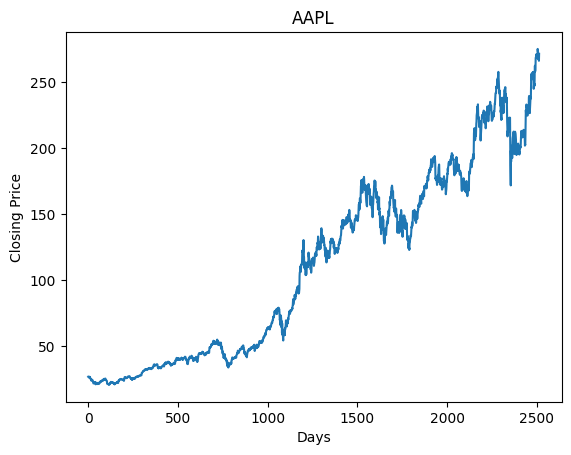

In [12]:
plt.figure()
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Closing Price')

## 3. Feature Engineering

In [13]:
## 100 daysmoving average
df['MA_100'] = df.Close.rolling(100).mean()

Text(0, 0.5, 'Closing Price')

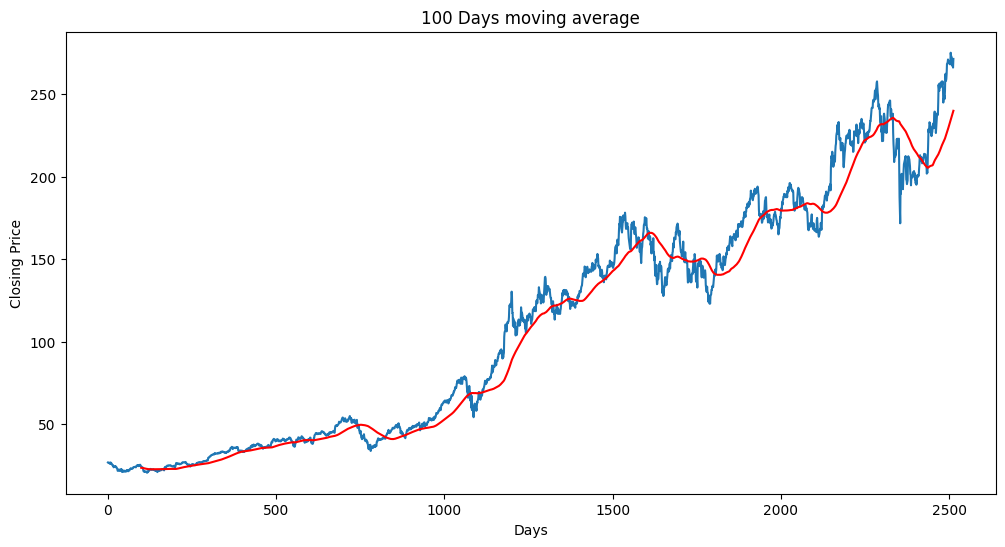

In [14]:

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(df.MA_100, 'r')
plt.title('100 Days moving average')
plt.xlabel('Days')
plt.ylabel('Closing Price')

### Caluculating percentage change in each trading session 

In [15]:
df['Percentage Changed'] = df.Close.pct_change()

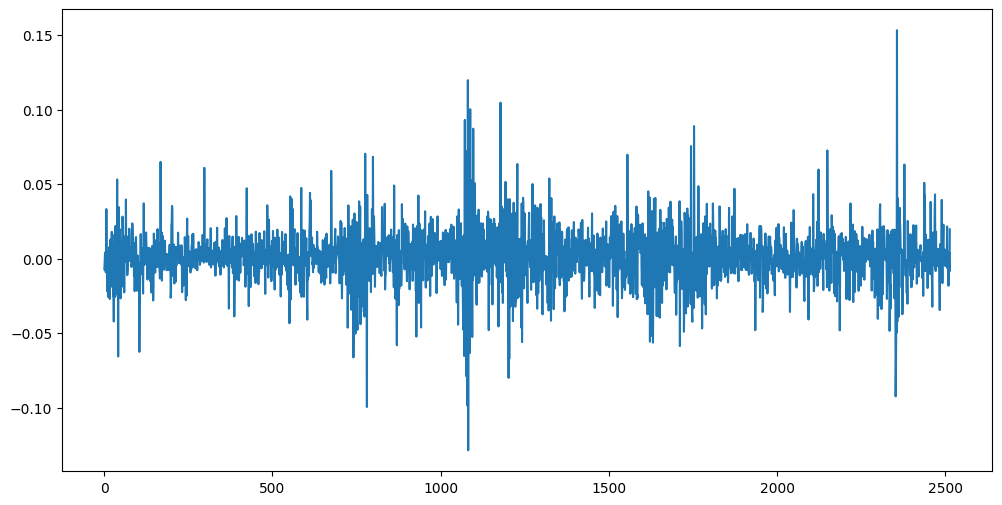

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Percentage Changed'])

## 3. Data Preprocessing

In [17]:
# !pip install scikit-learn
# !pip install keras
df.shape

(2514, 8)

In [18]:
## Splitting the data into training and testing sets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): len(df)])

In [19]:
data_training.shape, data_testing.shape


((1759, 1), (755, 1))

In [20]:
print(data_training)

Ticker        AAPL
0        26.803745
1        26.612099
2        26.562498
3        26.672983
4        26.456524
...            ...
1754    147.475128
1755    146.076263
1756    147.810104
1757    146.578659
1758    148.479996

[1759 rows x 1 columns]


In [21]:
print(data_testing)

Ticker        AAPL
1759    149.041534
1760    145.810287
1761    147.947998
1762    148.824799
1763    145.908798
...            ...
2509    267.459991
2510    267.440002
2511    268.559998
2512    266.250000
2513    271.489990

[755 rows x 1 columns]


### Scalling down the data between 0 and 1

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03932148],
       [0.03810595],
       [0.03779136],
       ...,
       [0.80680578],
       [0.79899532],
       [0.81105457]], shape=(1759, 1))

## Sequence Creation

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])
    

In [25]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
x_train.ndim, x_train.shape

(3, (1659, 100, 1))

In [27]:
y_train.ndim, y_train.shape

(1, (1659,))

## 6.Model Building

In [28]:
# !pip install tensorflow

In [29]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input 

In [31]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model trainning

In [32]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0103
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 7.4083e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 6.1077e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 5.9922e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 5.6534e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 5.4679e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 5.0340e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 6.0679e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 4.7657e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.3909e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 4.7860e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 4.6076e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 5.0871e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 4.2919e-04
Epoch 15/50
52/52 

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [35]:
## saving the model
model.save('stock_prediction_model.keras')

## 8. Preparing the test data

In [36]:
past_100_days = data_training.tail(100)

In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [38]:
final_df

Ticker,AAPL
0,136.743683
1,134.278473
2,136.448975
3,139.032059
4,140.367767
...,...
850,267.459991
851,267.440002
852,268.559998
853,266.250000


In [39]:
#lets scale this data
input_data = scaler.fit_transform(final_df)

In [40]:
input_data.shape

(855, 1)

In [41]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])


In [42]:
x_test, y_test = np.array(x_test), np.array(y_test) 

In [43]:
x_test[0].shape, y_test.shape

((100, 1), (755,))

## 9. Making predictions

In [44]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [45]:
## converting the data into its original form
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [46]:
y_predicted

array([147.18697 , 147.78716 , 147.03308 , 146.968   , 147.406   ,
       146.81673 , 144.90036 , 142.36195 , 142.81535 , 143.9773  ,
       144.78175 , 144.82495 , 143.41687 , 141.49202 , 140.64331 ,
       140.1938  , 140.75706 , 141.71722 , 141.71724 , 139.31006 ,
       136.49707 , 133.8583  , 132.10046 , 132.07138 , 131.57979 ,
       131.00443 , 130.03989 , 128.10822 , 127.4922  , 127.516754,
       126.336525, 125.50843 , 124.64704 , 125.288155, 126.336945,
       127.34787 , 128.82327 , 129.95442 , 131.01836 , 132.07312 ,
       132.56923 , 132.76512 , 133.60066 , 135.35312 , 137.2602  ,
       138.38571 , 139.5997  , 141.07341 , 141.1705  , 141.30359 ,
       141.78004 , 143.98537 , 147.16908 , 148.54837 , 150.00284 ,
       149.97447 , 149.2348  , 148.73074 , 149.47612 , 150.05118 ,
       151.16261 , 151.43326 , 151.00494 , 149.14482 , 147.7963  ,
       147.2295  , 146.15382 , 145.77135 , 145.52708 , 144.70502 ,
       144.23174 , 145.72404 , 148.15886 , 149.19125 , 149.930

In [47]:
y_test


array([149.04153442, 145.81028748, 147.94799805, 148.82479858,
       145.90879822, 142.07658386, 139.07191467, 145.82998657,
       146.10583496, 145.61325073, 144.45079041, 140.78608704,
       138.84535217, 140.52992249, 140.04722595, 142.34259033,
       143.30802917, 141.08158875, 134.47134399, 132.51087952,
       130.40270996, 130.33375549, 133.43696594, 130.26480103,
       129.90031433, 128.09750366, 124.16678619, 127.6837616 ,
       127.9989624 , 123.21121216, 124.48204803, 123.16195679,
       127.69358063, 128.2157135 , 128.78707886, 131.506073  ,
       131.42726135, 132.75714111, 133.91964722, 133.20051575,
       133.2596283 , 135.82095337, 139.01281738, 140.41172791,
       139.75169373, 141.82044983, 143.76116943, 140.87475586,
       142.14552307, 143.26861572, 148.57849121, 152.2038269 ,
       149.47497559, 152.3515625 , 149.66218567, 148.6277771 ,
       148.99279785, 151.79489136, 151.15359497, 153.25514221,
       151.65673828, 150.51226807, 146.49661255, 146.92

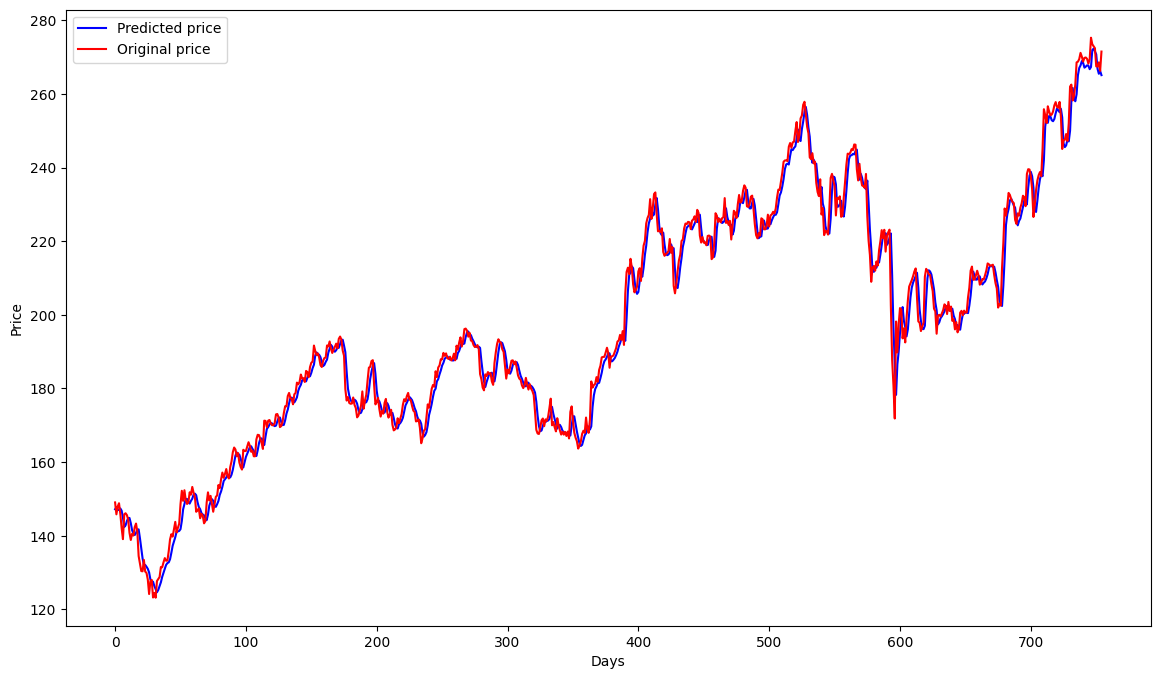

In [48]:
plt.figure(figsize=(14, 8))
plt.plot(y_predicted, 'b', label='Predicted price')
plt.plot(y_test, 'r', label='Original price' )
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

## 10. Model evaluation




In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predicted)
print('Mean Squared error (MSE): ',mse)

Mean Squared error (MSE):  14.40647472328597


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print('R2 score: ', r2)

R2 score:  0.987191598835866


## Multivariate LSTM


In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
df_features = df[features].copy()

In [53]:
split_ratio = 0.7  # 70% train, 30% test
split_index = int(len(df_features) * split_ratio)

train_df = df_features.iloc[:split_index].values
test_df  = df_features.iloc[split_index:].values

In [54]:
# 4. Scale all features together
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_df)             # fit only on train data

train_scaled = scaler.transform(train_df)
test_scaled  = scaler.transform(test_df)


In [55]:
# 5. Helper to build sequences (X: sequences of timesteps with all features; y: the Close column value)
def create_sequences(data_scaled, timesteps, target_col_index):
    X, y = [], []
    for i in range(timesteps, len(data_scaled)):
        X.append(data_scaled[i-timesteps:i, :])     # shape (timesteps, n_features)
        y.append(data_scaled[i, target_col_index])  # target is scaled Close value
    return np.array(X), np.array(y)

timesteps = 60
n_features = len(features)
target_col = 'Close'
target_index = features.index(target_col)

# Build train sequences
X_train, y_train = create_sequences(train_scaled, timesteps, target_index)

# For test sequences we need to concatenate last `timesteps` rows of train to start of test
# so sequences in test have proper previous context.
combined = np.vstack([train_scaled[-timesteps:], test_scaled])
X_test, y_test = create_sequences(combined, timesteps, target_index)
# Note: y_test corresponds to scaled Close values for the test part


In [56]:
# 6. Build the LSTM model (multivariate input)
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(timesteps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))   # predict the Close (scaled)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


D:\Google\Anaconda\envs\djangoEnv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          42,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,651 (283.79 KB)

 Trainable params: 72,651 (283.79 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# 7. Train
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    verbose=1
)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0169 - mae: 0.0708 - val_loss: 0.0023 - val_mae: 0.0396
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0023 - mae: 0.0302 - val_loss: 0.0025 - val_mae: 0.0405
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0020 - mae: 0.0278 - val_loss: 0.0024 - val_mae: 0.0402
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018 - mae: 0.0266 - val_loss: 0.0018 - val_mae: 0.0359
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0019 - mae: 0.0267 - val_loss: 0.0020 - val_mae: 0.0375
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0017 - mae: 0.0261 - val_loss: 0.0031 - val_mae: 0.0455
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0015 - mae: 0.0250 - val_loss: 0.0017 - val_mae: 0.0346
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0016 - mae: 0.0243 - val_loss: 0.0022 - val_mae: 0.0387
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - lo

In [58]:
# 8. Predict on X_test (scaled predictions)
y_pred_scaled = model.predict(X_test)  # shape (n_samples, 1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [59]:
# 9. Inverse transform scaled Close predictions back to original scale
# We trained scaler on ALL features; to inverse-transform a single feature,
# create a dummy array with same n_features, put predicted Close into Close column,
# inverse_transform and then extract Close column.

def inverse_transform_close(scaled_values, scaler, n_features, close_index):
    # scaled_values shape: (n_samples, )
    scaled_values = np.array(scaled_values).reshape(-1)
    zeros = np.zeros((len(scaled_values), n_features))
    zeros[:, close_index] = scaled_values
    inv = scaler.inverse_transform(zeros)
    return inv[:, close_index]

# inverse transform predicted and true y
y_pred = inverse_transform_close(y_pred_scaled.flatten(), scaler, n_features, target_index)
y_true = inverse_transform_close(y_test.flatten(), scaler, n_features, target_index)


In [60]:
# 10. Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
model.save("final_multivariate_LSTM_model.keras")


RMSE: 9.7507
MAE : 7.4740


In [61]:
model.save("multivariate_LSTM_model.keras")